In [1]:
#!pip install scikit-uplift
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
#from sklift.models import SoloModel
#from sklift.models import ClassTransformation
#from sklift.metrics import uplift_at_k



In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_paths = '/content/drive/MyDrive/Colab-Notebooks/Causality Genesis Demonstrator/genesis-demo/Genesis_AnomalyLabels.csv'
    #'Genesis_lineardrive.csv': '/content/drive/MyDrive/Colab Notebooks/Causality Genesis Demonstrator/genesis-demo/Genesis_lineardrive.csv',
    #'Genesis_normal.csv': '/content/drive/MyDrive/Colab Notebooks/Causality Genesis Demonstrator/genesis-demo/Genesis_normal.csv',
    #'Genesis_pressure.csv': '//content/drive/MyDrive/Colab Notebooks/Causality Genesis Demonstrator/genesis-demo/Genesis_pressure.csv',
    #'Genesis_StateMachineLabel.csv': '/content/drive/MyDrive/Colab Notebooks/Causality Genesis Demonstrator/genesis-demo/Genesis_StateMachineLabel.csv'}

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
labelled_anomaly = pd.read_csv(file_paths)
labelled_anomaly.head()

,Timestamp,Label,MotorData.ActCurrent,MotorData.ActPosition,MotorData.ActSpeed,MotorData.IsAcceleration,MotorData.IsForce,MotorData.Motor_Pos1reached,MotorData.Motor_Pos2reached,MotorData.Motor_Pos3reached,MotorData.Motor_Pos4reached,NVL_Recv_Ind.GL_Metall,NVL_Recv_Ind.GL_NonMetall,NVL_Recv_Storage.GL_I_ProcessStarted,NVL_Recv_Storage.GL_I_Slider_IN,NVL_Recv_Storage.GL_I_Slider_OUT,NVL_Recv_Storage.GL_LightBarrier,NVL_Send_Storage.ActivateStorage,PLC_PRG.Gripper,PLC_PRG.MaterialIsMetal
0,1.461149e+09,0,-5,268975,0,0,-1,0,0,0,0,0,1,0,1,0,1,0,0,0
1,1.461149e+09,0,0,268975,0,0,-1,0,0,0,0,0,1,0,1,0,1,0,0,0
2,1.461149e+09,0,-5,268975,0,0,-3,0,0,0,0,0,1,0,1,0,1,0,0,0
3,1.461149e+09,0,0,268975,0,0,4,0,0,0,0,0,1,0,1,0,1,0,0,0
4,1.461149e+09,0,0,268975,0,0,4,0,0,0,0,0,1,0,1,0,1,0,0,0


**Exploratory Data Analysis**

In [4]:
summary_stats = labelled_anomaly.describe(include='all')
summary_stats

,Timestamp,Label,MotorData.ActCurrent,MotorData.ActPosition,MotorData.ActSpeed,MotorData.IsAcceleration,MotorData.IsForce,MotorData.Motor_Pos1reached,MotorData.Motor_Pos2reached,MotorData.Motor_Pos3reached,MotorData.Motor_Pos4reached,NVL_Recv_Ind.GL_Metall,NVL_Recv_Ind.GL_NonMetall,NVL_Recv_Storage.GL_I_ProcessStarted,NVL_Recv_Storage.GL_I_Slider_IN,NVL_Recv_Storage.GL_I_Slider_OUT,NVL_Recv_Storage.GL_LightBarrier,NVL_Send_Storage.ActivateStorage,PLC_PRG.Gripper,PLC_PRG.MaterialIsMetal
count,1.622000e+04,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.000000,16220.00000,16220.000000,16220.000000,16220.000000,16220.000000
mean,1.461149e+09,0.003761,-4.714057,207315.832922,139.400247,-1.587670,-1.811961,0.063933,0.140382,0.194513,0.060296,0.065043,0.934957,0.142417,0.845931,0.13058,0.997534,0.020592,0.515845,0.104747
std,2.195389e+02,0.071437,397.293682,107775.856354,57928.033474,513.080888,89.007441,0.244642,0.347394,0.395837,0.238042,0.246610,0.246610,0.349488,0.361026,0.33695,0.049600,0.142018,0.499764,0.306237
min,1.461149e+09,0.000000,-1181.000000,22011.000000,-422617.000000,-3045.000000,-256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.461149e+09,0.000000,-174.000000,140012.000000,-53352.750000,0.000000,-38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000
50%,1.461149e+09,0.000000,3.000000,229013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000
75%,1.461149e+09,0.000000,189.000000,266191.000000,57275.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000
max,1.461149e+09,2.000000,1181.000000,389992.000000,110954.000000,6090.000000,260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


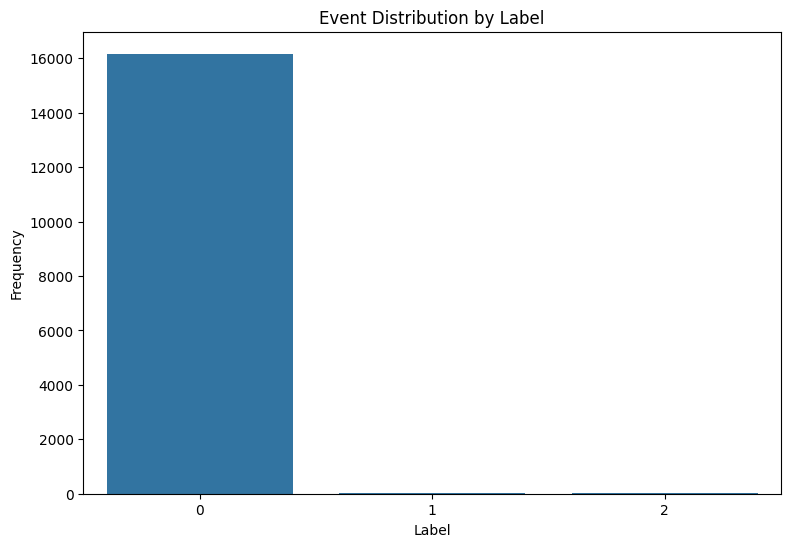

In [5]:
label_counts = labelled_anomaly['Label'].value_counts()
plt.figure(figsize=(9, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Event Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

In [6]:
label_counts = labelled_anomaly['Label'].value_counts()
# Checking for unexpected classes in the Label column.
unique_labels = labelled_anomaly['Label'].unique()
unique_labels
label_counts


,count
Label,
0,16170
1,39
2,11


**Label 0:** No anomaly detected in 16,170 entries.  
**Label 1:** 39 entries show anomalies due to the linear drive being jammed or tilted.  
**Label 2:** 11 entries show anomalies caused by the linear drive breaking free and correcting accumulated lag error.

In [7]:
labelled_anomaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16220 entries, 0 to 16219
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Timestamp                             16220 non-null  float64
 1   Label                                 16220 non-null  int64  
 2   MotorData.ActCurrent                  16220 non-null  int64  
 3   MotorData.ActPosition                 16220 non-null  int64  
 4   MotorData.ActSpeed                    16220 non-null  int64  
 5   MotorData.IsAcceleration              16220 non-null  int64  
 6   MotorData.IsForce                     16220 non-null  int64  
 7   MotorData.Motor_Pos1reached           16220 non-null  int64  
 8   MotorData.Motor_Pos2reached           16220 non-null  int64  
 9   MotorData.Motor_Pos3reached           16220 non-null  int64  
 10  MotorData.Motor_Pos4reached           16220 non-null  int64  
 11  NVL_Recv_Ind.GL

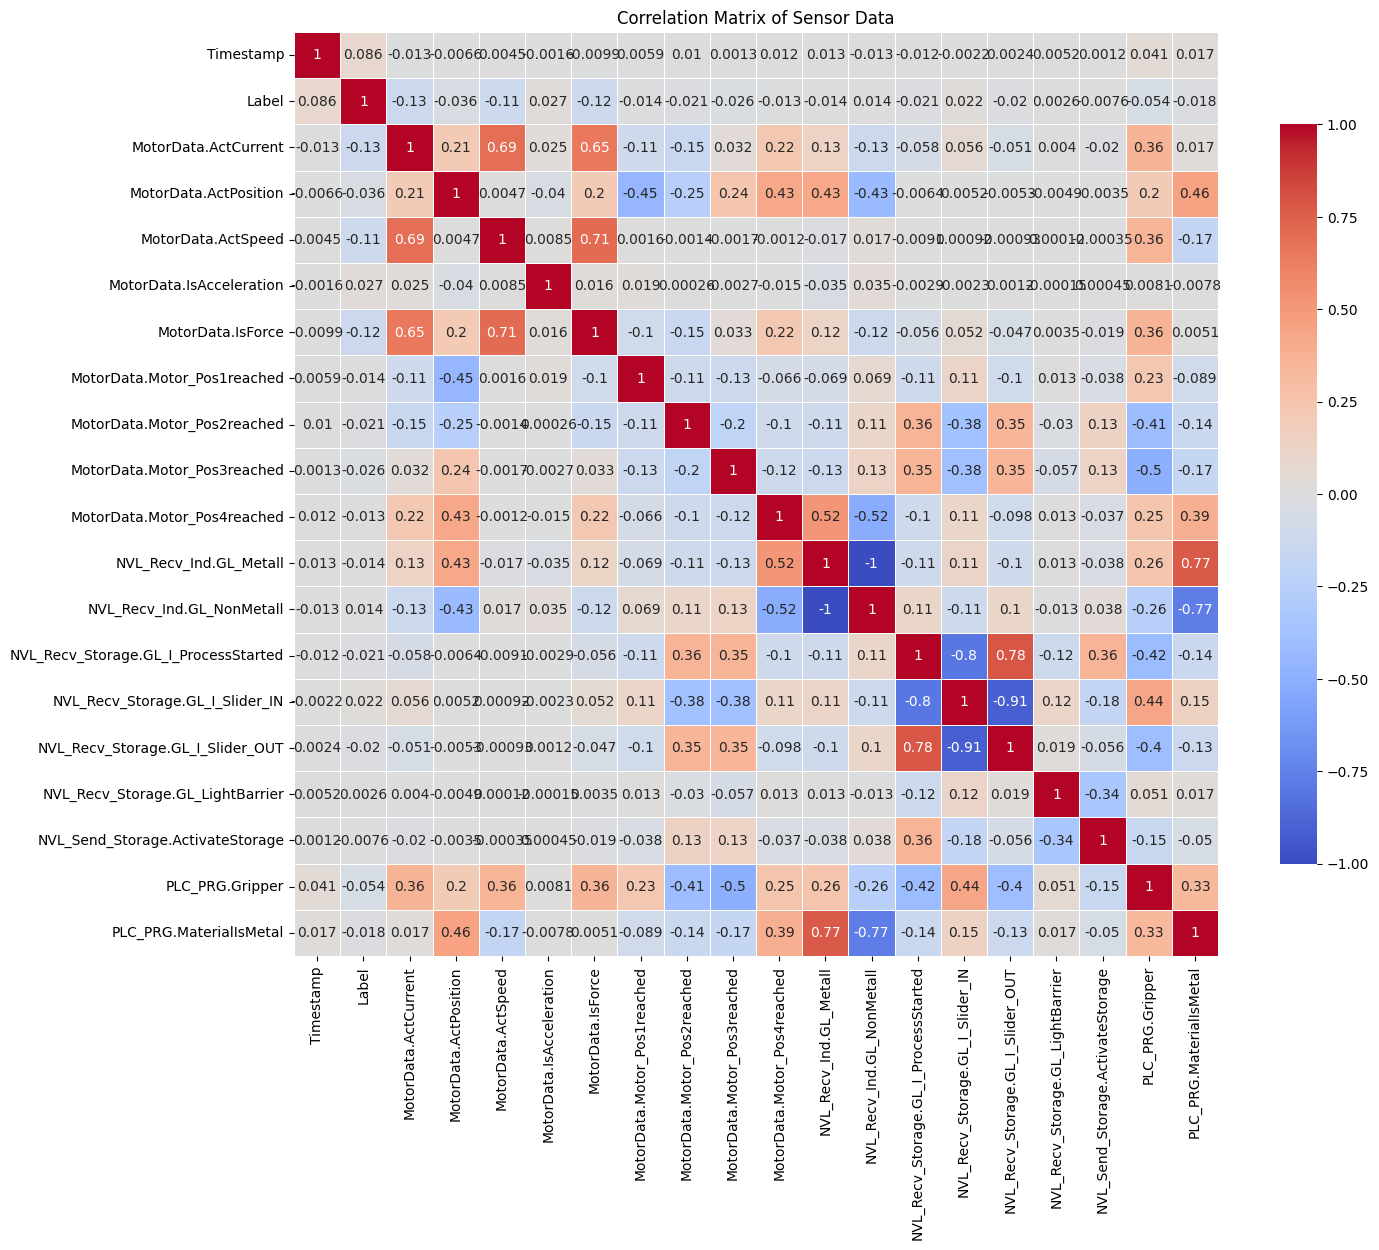

In [8]:
# Calculate the correlation matrix for the dataset
correlation_matrix = labelled_anomaly.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Generate a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True,
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Sensor Data')
plt.show()


NVL_Recv_Storage.GL_I_Slider_IN and NVL_Recv_Storage.GL_I_Slider_OUT has a high negative correlation of **-0.91** indicating minor sensor noise or delays.

The correlation of **-0.77** for PLC_PRG.MaterialIsMetal and NVL_Recv_Ind.GL_NonMetall indicates slight variations or transitional states sensors are not perfectly synchronized.

The strong but not perfect negative correlation of **-0.8** between  NVL_Recv_Storage.GL_I_ProcessStarted and NVL_Recv_Storage.GL_I_Slider_IN suggests that most of the time, the slider transitions out of the retracted position when the process starts. However, there may be brief overlaps or delays where the start button is pressed while the slider is still fully retracted.

The high correlation value of **0.71** in MotorData.IsForce vs MotorData.ActSpeed states that as the motor force increases, the velocity of the motor tends to increase relatively. However, perfect correlation is unlikely due to friction, heat loss or accelaration.

The high correlation value of **0.77** in NVL_ Recv_Ind.GL Metall vs PLC_PRG.MateriallsMetal  indicates that the sensor gives **TRUE** value when the metal block is in the range of the sensor and the holding variable is detected as **metal**.

The very high correlation of **0.78** in NVL_Recv_Storage.GL_1_ProcessStarted vs NVL_Recv_Storage.GL_I_Slider_OUT indicates that when power button is pressed to start a new cycle the storage is fully extended and the material is ejected.



In [9]:
# Selecting a few key sensor readings to visualize against the anomaly label for clarity
sensor_columns = [
    'MotorData.ActCurrent', 'MotorData.ActPosition', 'MotorData.ActSpeed',
    'MotorData.IsAcceleration', 'MotorData.IsForce'
]

<ipython-input-10-b784d3e0da47>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=labelled_anomaly, x='Label', y=sensor, palette='coolwarm')
<ipython-input-10-b784d3e0da47>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=labelled_anomaly, x='Label', y=sensor, palette='coolwarm')
<ipython-input-10-b784d3e0da47>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=labelled_anomaly, x='Label', y=sensor, palette='coolwarm')
<ipython-input-10-b784d3e0da47>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

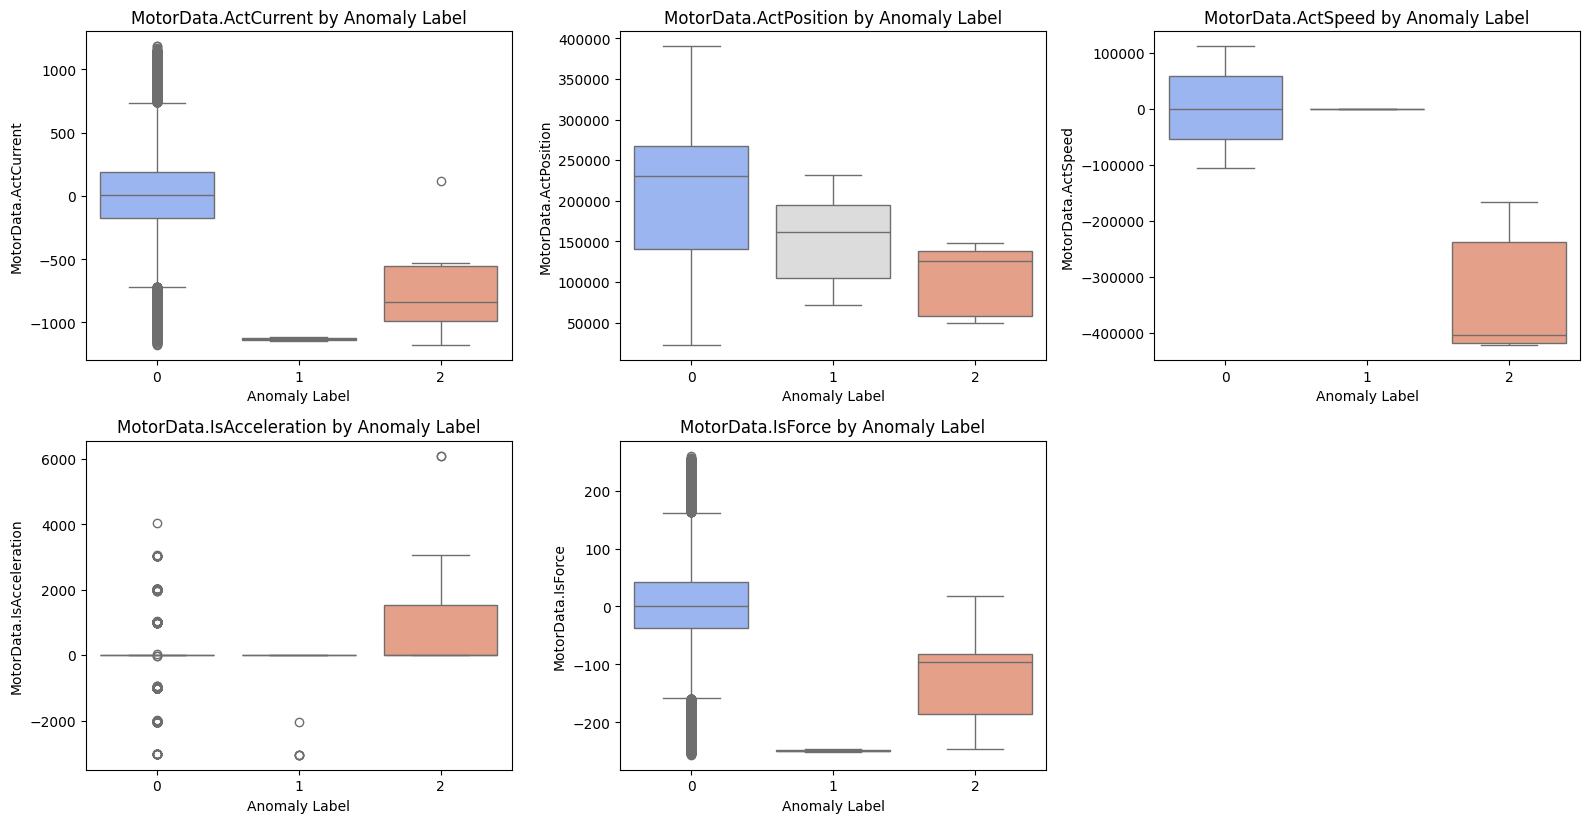

In [10]:

# Plotting sensor readings against anomaly labels using box plots for each selected sensor
plt.figure(figsize=(16, 12))
for i, sensor in enumerate(sensor_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=labelled_anomaly, x='Label', y=sensor, palette='coolwarm')
    plt.title(f'{sensor} by Anomaly Label')
    plt.xlabel('Anomaly Label')
    plt.ylabel(sensor)

plt.tight_layout()
plt.show()


There exits an outlier in the boxplot of MotorData.ActCurrent by Anomaly Label due to **breaks free of linear drive and corrects accumulated lag error**.

In contrast, a large number of outliers are visible in the MotorData.IsAcceleration by Anomaly Label boxplot for Label 0 indicating **no anomaly**. However, outliers are seen due to **linear drive jammed / tilted** under Label 1 and **Label 2**.

Additionaly, MotorData.ActCurrent and MotorData.IsForce has a broader range in normal readings compared to anomalies.

In [11]:
# additional_sensor_columns = [
#     'MotorData.Motor_Pos1reached', 'MotorData.Motor_Pos2reached', 'MotorData.Motor_Pos3reached',
#     'NVL_Recv_Ind.GL_Metall', 'NVL_Recv_Ind.GL_NonMetall', 'NVL_Recv_Storage.GL_LightBarrier', 'NVL_Recv_Storage.GL_I_Slider_IN', 'NVL_Recv_Storage.GL_I_Slider_OUT', 'NVL_Recv_Storage.GL_I_ProcessStarted',
#     'NVL_Send_Storage.ActivateStorage', 'PLC_PRG.Gripper', 'PLC_PRG.MaterialIsMetal'
# ]

# # Plotting sensor readings against anomaly labels using box plots for each selected sensor
# plt.figure(figsize=(12, 25))
# for i, sensor in enumerate(additional_sensor_columns, 1):
#     plt.subplot(5,3,i)
#     sns.boxplot(data=labelled_anomaly, x='Label', y=sensor, palette='coolwarm')
#     plt.title(f'{sensor} by Anomaly Label')
#     plt.xlabel('Anomaly Label')
#     plt.ylabel(sensor)

# plt.tight_layout()
# plt.show()


No anomalous outlier is present.

In [12]:
# Logical flag for outliers
labelled_anomaly['ProcessStarted_SliderIn_Mismatch'] = (labelled_anomaly['NVL_Recv_Storage.GL_I_ProcessStarted'] & labelled_anomaly['NVL_Recv_Storage.GL_I_Slider_IN'])
labelled_anomaly['Slider_Conflict'] = (labelled_anomaly['NVL_Recv_Storage.GL_I_Slider_IN'] & labelled_anomaly['NVL_Recv_Storage.GL_I_Slider_OUT'])
labelled_anomaly['DetectedMetal_Conflict'] = (labelled_anomaly['PLC_PRG.MaterialIsMetal'] & ~labelled_anomaly['NVL_Recv_Ind.GL_NonMetall'])

# Summary of flagged outliers
outlier_flags = ['Slider_Conflict','ProcessStarted_SliderIn_Mismatch', 'DetectedMetal_Conflict']
outlier_summary = labelled_anomaly[outlier_flags].sum()
print(outlier_summary)

Slider_Conflict                        0
ProcessStarted_SliderIn_Mismatch     315
DetectedMetal_Conflict              1055
dtype: int64


In [13]:
# variables = [
#     'MotorData.Motor_Pos1reached',
#     'MotorData.Motor_Pos2reached',
#     'MotorData.Motor_Pos3reached',
#     'MotorData.Motor_Pos4reached',
#     'NVL_Recv_Ind.GL_Metall',
#     'NVL_Recv_Ind.GL_NonMetall',
#     'NVL_Recv_Storage.GL_I_ProcessStarted',
#     'NVL_Recv_Storage.GL_I_Slider_IN',
#     'NVL_Recv_Storage.GL_I_Slider_OUT',
#     'NVL_Recv_Storage.GL_LightBarrier',
#     'NVL_Send_Storage.ActivateStorage',
#     'PLC_PRG.Gripper',
#     'PLC_PRG.MaterialIsMetal'
# ]

# num_vars = len(variables)
# rows = (num_vars + 2) // 3
# cols = 3

# plt.figure(figsize=(15, 5 * rows))

# for i, var in enumerate(variables, 1):
#     plt.subplot(rows, cols, i)
#     sns.histplot(labelled_anomaly[var], bins=10, kde=False, color='blue', edgecolor='black')
#     plt.title(f'Histogram of {var}')
#     plt.xlabel(var)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()

In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Sample DataFrame loading. Replace this with your actual data loading code.
# # df = pd.read_csv('path_to_your_data.csv')
# df = labelled_anomaly
# # Define the sensor columns
# additional_sensor_columns = [
#     'MotorData.Motor_Pos1reached', 'MotorData.Motor_Pos2reached', 'MotorData.Motor_Pos3reached',
#     'NVL_Recv_Ind.GL_Metall', 'NVL_Recv_Ind.GL_NonMetall', 'NVL_Recv_Storage.GL_LightBarrier',
#     'NVL_Recv_Storage.GL_I_Slider_IN', 'NVL_Recv_Storage.GL_I_Slider_OUT', 'NVL_Recv_Storage.GL_I_ProcessStarted',
#     'NVL_Send_Storage.ActivateStorage', 'PLC_PRG.Gripper', 'PLC_PRG.MaterialIsMetal'
# ]
# # Create a figure with subplots - adjust the size accordingly
# fig, axes = plt.subplots(nrows=len(additional_sensor_columns), figsize=(12, 20))

# # Loop through each column and create a bar plot
# for i, col in enumerate(additional_sensor_columns):
#     # Count the occurrences of each category
#     value_counts = df[col].value_counts()
#     # Create bar plot
#     axes[i].bar(value_counts.index.astype(str), value_counts.values, color=['blue', 'green'])
#     axes[i].set_title(col)
#     axes[i].set_ylabel('Count')
#     axes[i].set_xlabel('Categories')

# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()


In [15]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assume 'labelled_anomaly' is your DataFrame loaded with appropriate data.
# # Make sure to replace this with your actual DataFrame loading if needed.

# additional_sensor_columns = [
#     'MotorData.Motor_Pos1reached', 'MotorData.Motor_Pos2reached', 'MotorData.Motor_Pos3reached',
#     'NVL_Recv_Ind.GL_Metall', 'NVL_Recv_Ind.GL_NonMetall', 'NVL_Recv_Storage.GL_LightBarrier',
#     'NVL_Recv_Storage.GL_I_Slider_IN', 'NVL_Recv_Storage.GL_I_Slider_OUT', 'NVL_Recv_Storage.GL_I_ProcessStarted',
#     'NVL_Send_Storage.ActivateStorage', 'PLC_PRG.Gripper', 'PLC_PRG.MaterialIsMetal'
# ]

# # Create a figure with subplots - adjust the size accordingly
# plt.figure(figsize=(12, 25))

# for i, sensor in enumerate(additional_sensor_columns, 1):
#     plt.subplot(5, 3, i)  # Adjust the grid definition according to the number of plots
#     ax = sns.countplot(data=labelled_anomaly, x='Label', hue=sensor, palette='coolwarm')
#     plt.title(f'{sensor} by Anomaly Label')
#     plt.xlabel('Anomaly Label')
#     plt.ylabel('Count')
#     plt.legend(title=sensor)

#     # Add annotations
#     for p in ax.patches:
#         ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
#                     textcoords='offset points')

# plt.tight_layout()
# plt.show()


In [16]:
labelled_anomaly = labelled_anomaly.drop('Timestamp', axis=1)  # Change 'TimeStamp' to 'Timestamp'

In [17]:
reference_dataset = labelled_anomaly[labelled_anomaly['Label'] == 0]#[sensor_columns]
inspection_dataset = labelled_anomaly  # Contains both normal and anomalous entries

**Data Pre-processing**

In [18]:
columns_to_normalize = [
    'MotorData.ActCurrent', 'MotorData.ActPosition', 'MotorData.ActSpeed',
    'MotorData.IsAcceleration', 'MotorData.IsForce',
    'MotorData.Motor_Pos1reached', 'MotorData.Motor_Pos2reached',
    'MotorData.Motor_Pos3reached', 'MotorData.Motor_Pos4reached',
    'NVL_Recv_Ind.GL_Metall', 'NVL_Recv_Ind.GL_NonMetall',
    'NVL_Recv_Storage.GL_I_ProcessStarted', 'NVL_Recv_Storage.GL_I_Slider_IN',
    'NVL_Recv_Storage.GL_I_Slider_OUT', 'NVL_Recv_Storage.GL_LightBarrier',
    'NVL_Send_Storage.ActivateStorage', 'PLC_PRG.Gripper', 'PLC_PRG.MaterialIsMetal'
]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize reference_dataset and inspection_dataset
normalized_reference = reference_dataset.copy()
normalized_reference[columns_to_normalize] = scaler.fit_transform(reference_dataset[columns_to_normalize])

normalized_inspection = inspection_dataset.copy()
normalized_inspection[columns_to_normalize] = scaler.transform(inspection_dataset[columns_to_normalize])


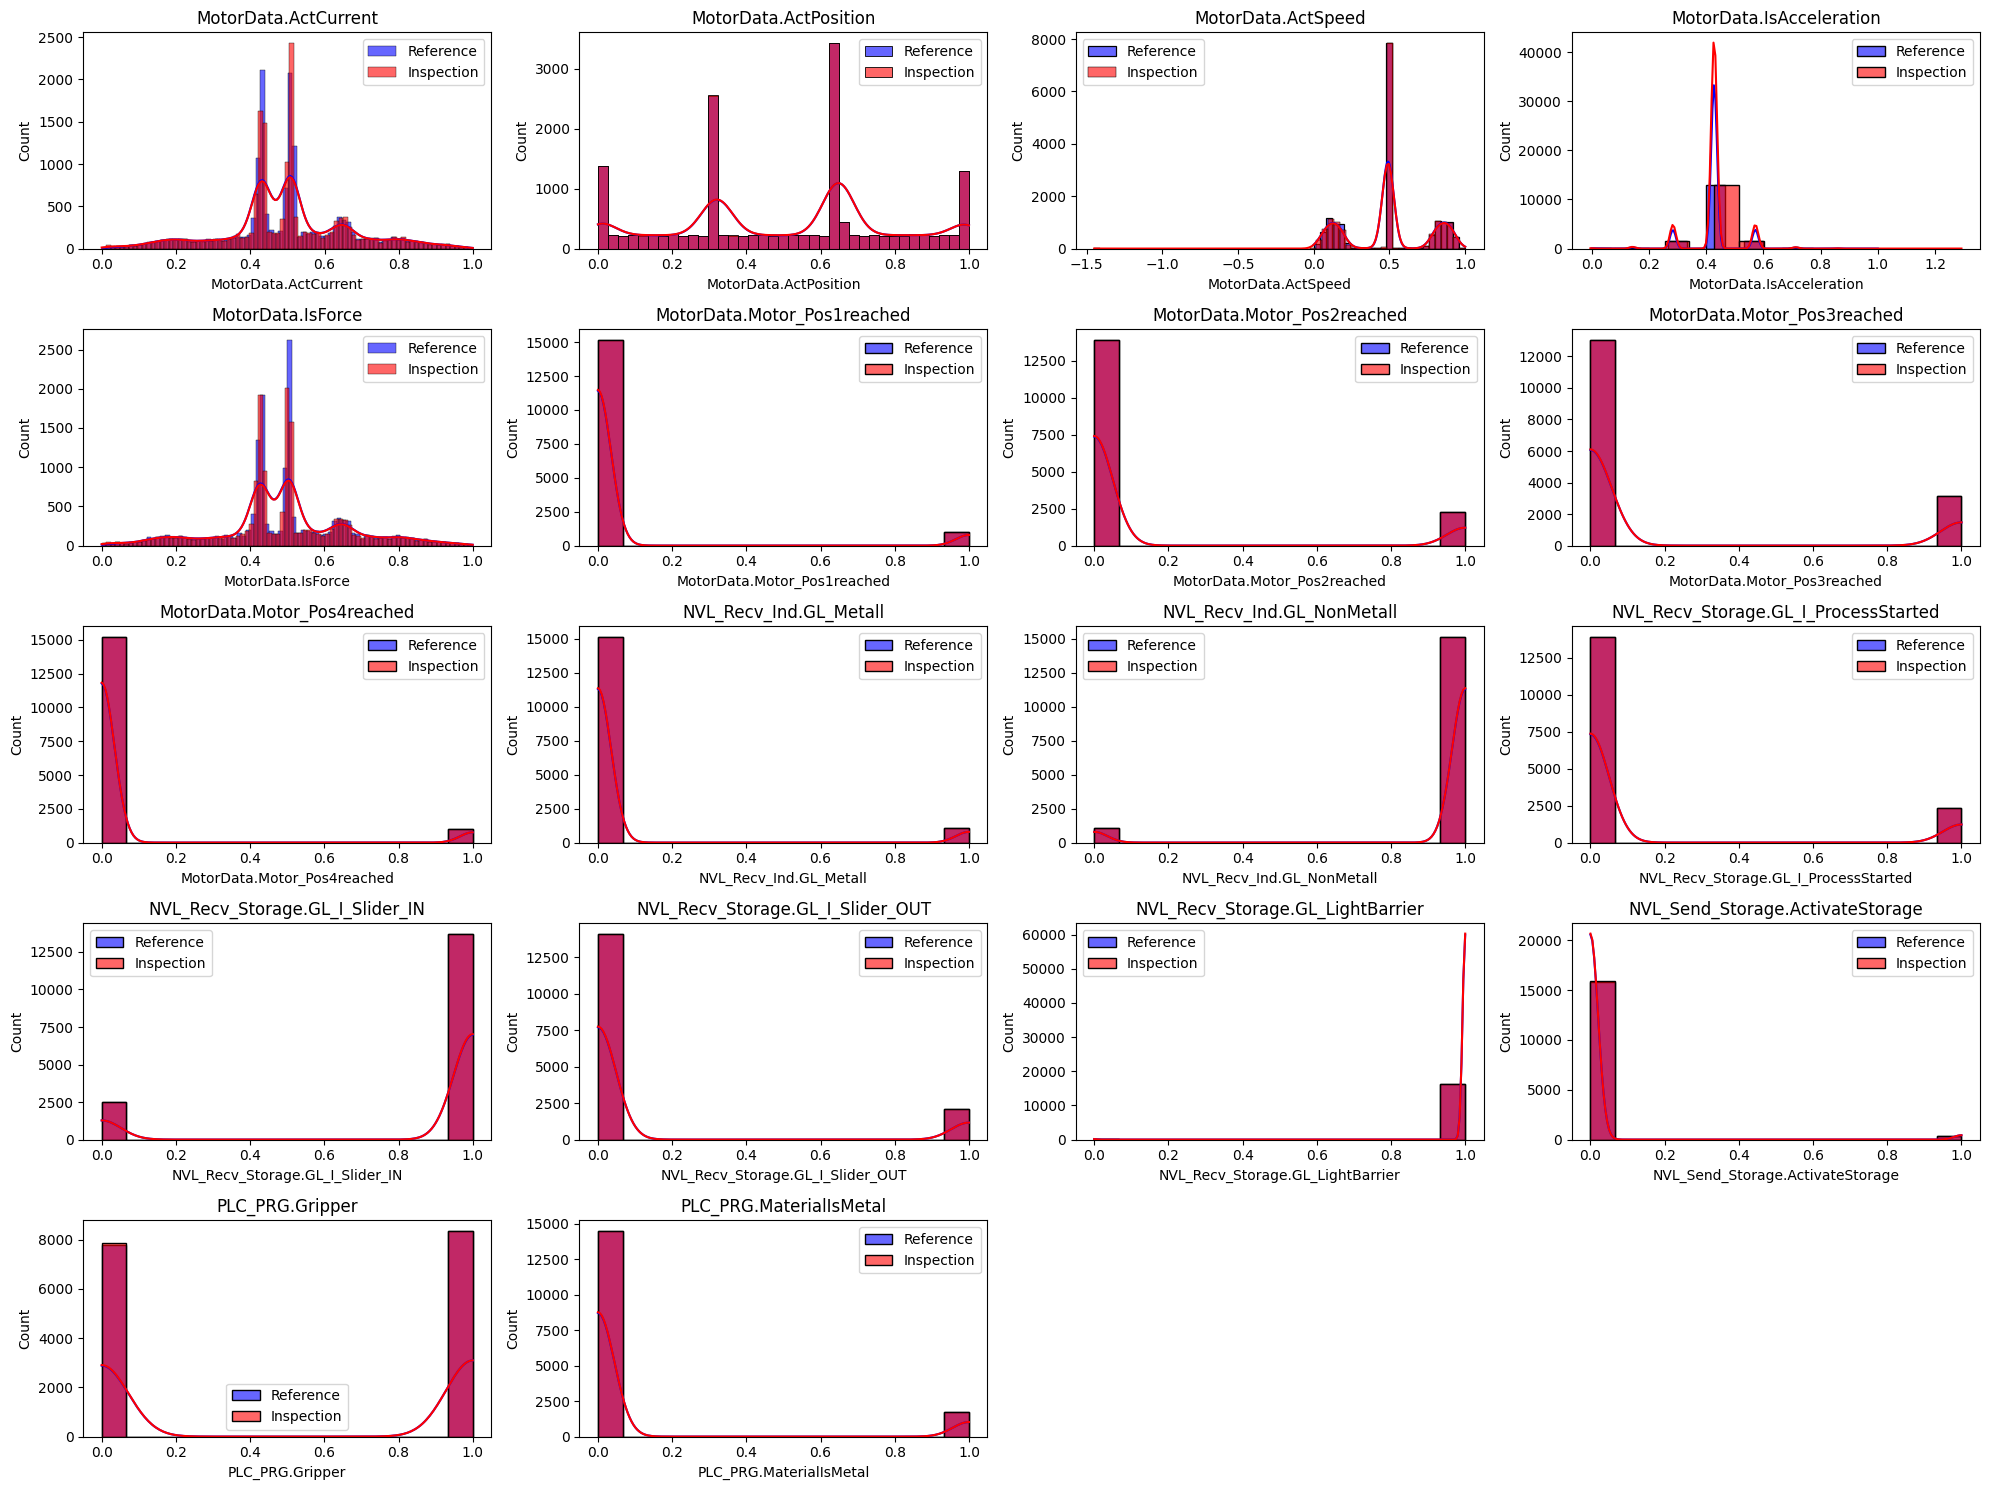

In [19]:
# Plot histograms for normalized variables
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_normalize, 1):
    plt.subplot(5, 4, i)
    sns.histplot(normalized_reference[column], kde=True, color='blue', label='Reference', alpha=0.6)
    sns.histplot(normalized_inspection[column], kde=True, color='red', label='Inspection', alpha=0.6)
    plt.title(column)
    plt.legend()
plt.tight_layout()
plt.show()


In [20]:
# # Initializing the scaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# # Fit the scaler on the reference dataset and apply the transformation to both datasets
# reference_dataset_scaled  = scaler.fit_transform(reference_dataset)
# inspection_dataset_scaled  = scaler.transform(inspection_dataset)



In [21]:
# # Convert scaled data back to DataFrames for plotting
# reference_dataset_scaled = pd.DataFrame(reference_dataset_scaled)
# inspection_dataset_scaled = pd.DataFrame(inspection_dataset_scaled) #, columns=sensor_columns

In [22]:
# # Plotting histograms for each feature before and after scaling
# plt.figure(figsize=(16, 20))
# for i, sensor in enumerate(sensor_columns, 1):
#     # Original data histogram
#     plt.subplot(len(sensor_columns), 2, 2 * i - 1)
#     sns.histplot(reference_dataset[sensor], kde=True, color='blue')
#     plt.title(f'{sensor} Before Normalization')
#     plt.xlabel(sensor)
#     plt.ylabel('Frequency')

#     # Normalized data histogram
#     plt.subplot(len(sensor_columns), 2, 2 * i)
#     sns.histplot(reference_dataset_scaled[sensor], kde=True, color='green')
#     plt.title(f'{sensor} After Normalization')
#     plt.xlabel(sensor)
#     plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()


**Feature Engineering for Anomaly Detection**

*Using k-NN*

In [23]:
# # Step 2: Compute k-th nearest neighbor distance for each instance in inspection dataset
# k = 5
# knn = NearestNeighbors(n_neighbors=k)
# knn.fit(normalized_inspection)

# # Calculate k-th nearest neighbor distances for inspection dataset
# distances, _ = knn.kneighbors(normalized_inspection)
# inspection_kth_distances = distances[:, -1]

In [24]:
# # k-NN Threshold: 95th percentile of distances in reference dataset
# reference_distances, _ = knn.kneighbors(normalized_reference)
# reference_kth_distances = reference_distances[:, -1]
# knn_threshold = np.percentile(reference_kth_distances, 95)

In [25]:
# # Plot distribution of k-th nearest neighbor distances
# plt.figure(figsize=(10, 6))
# sns.histplot(inspection_kth_distances, kde=True, color='purple')
# plt.title(f'Distribution of k-NN Distances (k={k})')
# plt.xlabel('k-th Nearest Neighbor Distance')
# plt.ylabel('Frequency')
# plt.show()

At 0.0, the peak indicates highly densed or clustered data points in this region. The small peak shows less clustered data points. The long tail extending towards higher k-nearest distance suggests presense of outliers.   

In [26]:
# # Assuming you have two datasets: 'normalized_inspection' and 'normalized_reference'
# # Ensure both datasets contain the same features, in the same order, before fitting and querying k-NN

# # Identify the feature columns used in 'normalized_inspection' (excluding 'Anomaly' or any non-feature columns)
# feature_columns = [col for col in normalized_inspection.columns if col not in ['Anomaly', 'Label',]]  # Update list as needed

# # Ensure both datasets include only these feature columns
# normalized_inspection_features = normalized_inspection[feature_columns]
# normalized_reference_features = normalized_reference[feature_columns]

# # Now setup k-NN with the consistent features
# knn = NearestNeighbors(n_neighbors=k)
# knn.fit(normalized_inspection_features)  # Fit model on inspection dataset features

# # Compute distances for inspection dataset
# distances, _ = knn.kneighbors(normalized_inspection_features)
# inspection_kth_distances = distances[:, -1]

# # Compute threshold from reference dataset
# reference_distances, _ = knn.kneighbors(normalized_reference_features)
# reference_kth_distances = reference_distances[:, -1]
# knn_threshold = np.percentile(reference_kth_distances, 95)

# # Flag anomalies based on the threshold
# normalized_inspection['Anomaly'] = inspection_kth_distances > knn_threshold


*Using IQR*

In [27]:
# # Step 1: Detect feature-wise outliers using IQR on the inspection dataset
# def detect_outliers_iqr(data: np.array, k=1.5) -> np.array:
#     q25, q75 = np.percentile(data, [25, 75])
#     iqr = q75 - q25
#     cutoff = iqr * k
#     lower_bound, upper_bound = q25 - cutoff, q75 + cutoff
#     outliers = np.logical_or(data < lower_bound, data > upper_bound)
#     return outliers

# # Create a DataFrame to count outliers for each feature in inspection dataset
# outlier_counts = pd.DataFrame(index=normalized_inspection.index)

# for feature in sensor_columns:
#     outliers = detect_outliers_iqr(normalized_inspection[feature].values)
#     outlier_counts[feature] = outliers

# # Count total outliers per instance in inspection dataset
# outlier_counts['total_outliers'] = outlier_counts.sum(axis=1)
# iqr_threshold = np.percentile(outlier_counts['total_outliers'], 95)  # Set based on 95th percentile

In [28]:
# plt.figure(figsize=(10, 6))
# sns.histplot(outlier_counts['total_outliers'], kde=True)
# plt.title('Distribution of Total Outliers per Instance')
# plt.xlabel('Number of Outliers')
# plt.ylabel('Frequency')
# plt.show()

The very tall bar at 0.0 suggests that the majority of data instances fall within the normal range for most features.  The two smaller bar represent fewer one or two features per instance fall outside the normal range.

*Using IQR-kNN method*

In [29]:
# # Step 4: Combine anomaly flags from both methods in inspection dataset
# # Flag anomalies in inspection dataset if either threshold is exceeded
# iqr_anomalies = outlier_counts['total_outliers'] > iqr_threshold
# knn_anomalies = inspection_kth_distances > knn_threshold

# # Combine flags: Flag as anomaly if either IQR or k-NN threshold is exceeded
# combined_anomalies = iqr_anomalies | knn_anomalies

# # Results
# anomaly_indices = combined_anomalies[combined_anomalies].index
# print("Number of anomalies detected:", len(anomaly_indices))
# print("Anomalies detected at indices:", list(anomaly_indices))


In [30]:
# # Visualize combined anomaly detection results
# plt.figure(figsize=(10, 6))
# sns.histplot(outlier_counts['total_outliers'], kde=True, label='IQR Outliers')
# sns.histplot(inspection_kth_distances, kde=True, color='purple', label='k-NN Distances')
# plt.axvline(iqr_threshold, color='blue', linestyle='--', label='IQR Threshold')
# plt.axvline(knn_threshold, color='purple', linestyle='--', label='k-NN Threshold')
# plt.title('Combined IQR and k-NN Anomaly Detection Thresholds')
# plt.xlabel('Outlier Counts and k-NN Distances')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

**Using Isolation Forest**

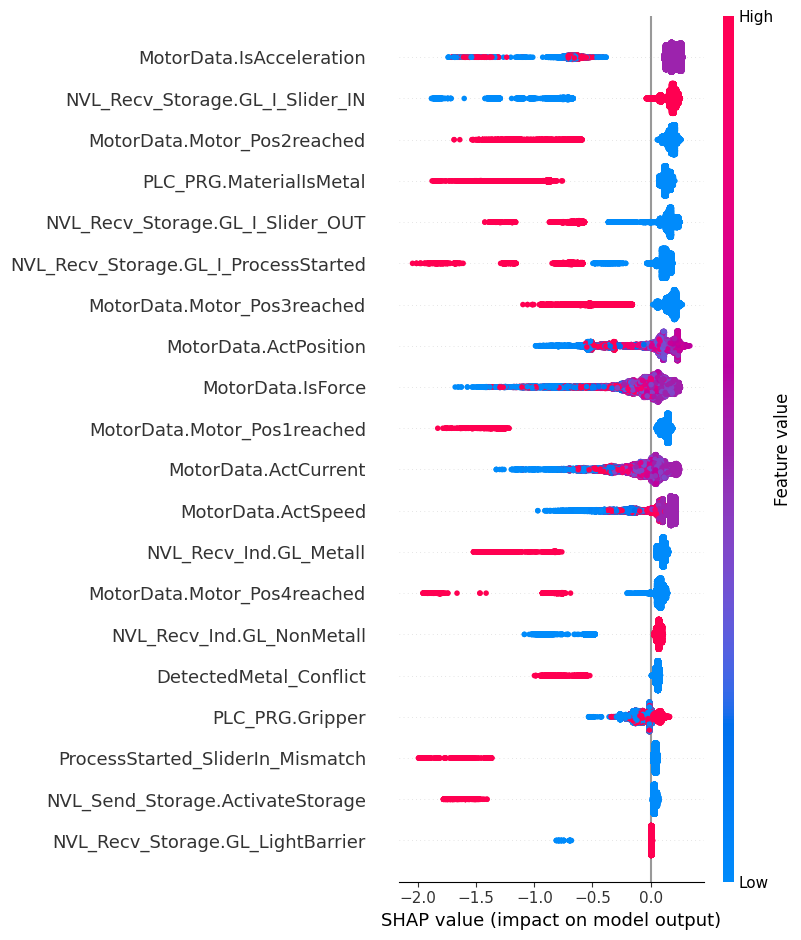

In [31]:
import shap
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model on the reference dataset (normal data)
model = IsolationForest()
model.fit(normalized_reference)

# SHAP analysis on the inspection dataset
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the inspection dataset
shap_values = explainer.shap_values(normalized_inspection)

# Plot SHAP values to understand feature importance for anomalies
shap.summary_plot(shap_values, normalized_inspection)



MotorData.ActSpeed has a high density of points with positive SHAP values. This suggests that higher actuator speeds are strongly associated with anomalies.
NVL_Recv_Storage.GL_I_Slider_IN shows a strong positive impact on the model's anomaly prediction.
MotorData.Motor_Pos3reached and MotorData.Motor_Pos2reached both positions show a mix of positive and negative impacts, but predominantly, their higher values shift towards the right, indicating a positive correlation with anomalies.
MotorData.IsForce and MotorData.ActCurrent show a cluster of towards the negative side, suggesting lower values of these features reduce the likelihood of anomalies.

In [32]:
# # Anomalous variables detected by each method:
# V_M_D_knn = {'ActCurrent', 'ActPosition'}
# V_M_D_iqr = {'ActPosition', 'ActSpeed'}
# V_M_D_combined = {'ActCurrent', 'ActPosition', 'ActSpeed'}  # Combined IQR-kNN anomalies

# # Define the potential root cause sets (V_G, r) based on causal graph information
# # Replace these with actual sets depending on the causal dependencies for each root cause
# V_G_r_knn = {'ActCurrent', 'ActPosition', 'ActSpeed'}  # Root cause for k-NN
# V_G_r_iqr = {'ActSpeed', 'ActAcceleration'}  # Root cause for IQR
# V_G_r_combined = {'ActCurrent', 'ActPosition', 'ActSpeed', 'ActAcceleration'}  # Root cause for combined method

# # Function to calculate JRCS
# def calculate_jrcs(V_M_D, V_G_r):
#     intersection = len(V_M_D & V_G_r)
#     union = len(V_M_D | V_G_r)
#     return intersection / union if union > 0 else 0

# # Calculate JRCS for each method
# jrcs_knn = calculate_jrcs(V_M_D_knn, V_G_r_knn)
# jrcs_iqr = calculate_jrcs(V_M_D_iqr, V_G_r_iqr)
# jrcs_combined = calculate_jrcs(V_M_D_combined, V_G_r_combined)



In [33]:
# Sets of root cause variables based on causal graph
V_G_r_isolation = {'MotorData.ActSpeed', 'NVL_Recv_Storage.GL_I_Slider_IN', 'MotorData.Motor_Pos3reached', 'MotorData.Motor_Pos2reached',
                   'MotorData.ActCurrent', 'MotorData.IsForce'}

# Train Isolation Forest on the reference dataset
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(reference_dataset)

# Predict anomalies in the inspection dataset
inspection_predictions = isolation_forest.predict(inspection_dataset)

# Isolation Forest flags anomalies as -1, normal points as 1
# Get the set of variables (features) where anomalies were detected
anomalous_indices = np.where(inspection_predictions == -1)[0]
V_M_D_isolation = set(inspection_dataset.iloc[anomalous_indices].columns)

# Define function to calculate JRCS (from earlier example)
def calculate_jrcs(V_M_D, V_G_r):
    intersection = len(V_M_D & V_G_r)
    union = len(V_M_D | V_G_r)
    return intersection / union if union > 0 else 0

# Calculate JRCS score for Isolation Forest method
jrcs_isolation = calculate_jrcs(V_M_D_isolation, V_G_r_isolation)



In [34]:
results = pd.DataFrame({
    #'Method': ['k-NN', 'IQR', 'Combined IQR-kNN', 'Isolation Forest'],
    'Method': ['Isolation Forest'],
    #'Root Cause Variables': [V_G_r_knn, V_G_r_iqr, V_G_r_combined, V_G_r_isolation],
    'Root Cause Variables': [V_G_r_isolation],
    #'Anomalous Variables': [V_M_D_knn, V_M_D_iqr, V_M_D_combined, V_M_D_isolation],
    'Anomalous Variables': [V_M_D_isolation],
    #'JRCS Score': [jrcs_knn, jrcs_iqr, jrcs_combined, jrcs_isolation]
    'JRCS Score': [jrcs_isolation]
})

# Display the results in tabular form
results

,Method,Root Cause Variables,Anomalous Variables,JRCS Score
0,Isolation Forest,"{MotorData.ActSpeed, MotorData.ActCurrent, NVL...","{PLC_PRG.MaterialIsMetal, NVL_Recv_Storage.GL_...",0.272727


**Conclusion**

The Jaccard Root Cause Similarity (JRCS) score of 0.272727 indicates the overlap between the sets of root cause variables and anomalous variables, expressed as a fraction of their union. A score of approximately 0.27 suggests a moderate level of overlap. This means that while there is some correspondence between the identified root causes and the anomalies detected, not all root causes directly align with the detected anomalies, and not all anomalies can be directly explained by the identified root causes.

In [35]:
!apt-get install git -qq

In [36]:
!git config --global user.email "khadiza.siddique.tannee@gmail.com"
!git config --global user.name "Tannee-Siddique"

In [37]:
%cd /content/drive/MyDrive/Colab-Notebooks/Causality\ Genesis\ Demonstrator
!git init

/content/drive/MyDrive/Colab-Notebooks/Causality Genesis Demonstrator
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab-Notebooks/Causality Genesis Demonstrator/.git/


In [38]:
!git add .
!git commit -m "Initial commit"

error: open("ADSC 3920_Project Report.gdoc"): Operation not supported
error: unable to index file 'ADSC 3920_Project Report.gdoc'
fatal: adding files failed
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	ADSC 3920_Project Report.gdoc
	DG.ipynb
	RCA_Genesis_Demonstrator.ipynb
	Step-by-Step Plan for Causal Inference.gdoc
	The-Genesis-Demonstrator.png
	Untitled presentation.gslides
	Untitled0.ipynb
	dataset-card.png
	dataset-cover.png
	genesis-demo/

nothing added to commit but untracked files present (use "git add" to track)


In [39]:
!git remote add origin https://github.com/Tannee-Siddique/Root-Cause-Analysis-of-Automated-Systems-Through-Anomaly-Detection-Using-Isolation-Forest.git

In [41]:
!git branch

In [42]:
!git branch -m master main

In [43]:
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Tannee-Siddique/Root-Cause-Analysis-of-Automated-Systems-Through-Anomaly-Detection-Using-Isolation-Forest.git'


In [40]:
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Tannee-Siddique/Root-Cause-Analysis-of-Automated-Systems-Through-Anomaly-Detection-Using-Isolation-Forest.git'
